### Principle Component Analysis on Retail Images

This notebook examines the results of using PCA on the refined dataset of 32,201 flattened, greyscale images. This was one step in my exploratory analysis of the image data. It is a relatively simple and quick way to visualize some of the differences across the images. 

To follow along with the code below, you'll need to download the dataset here: xxx. You can replicate my data cleaning & processing by running load.py from the Processing section of this repo. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

%matplotlib inline 

In [3]:
df= pd.read_csv('../data/full_labels_df.csv')

In [4]:
loaded2 = np.load('../data/full_image_arr.npz')
image_arr = loaded2['b']/255

In [5]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
3,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
4,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt


### Top 25

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca25 = PCA(n_components=25)

In [8]:
full_pca25 = pca25.fit_transform(image_arr)

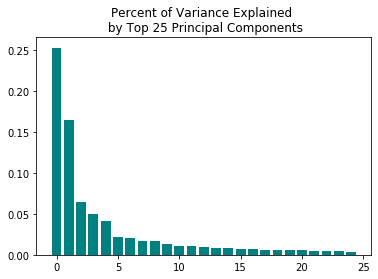

In [9]:
plt.bar(range(25),pca25.explained_variance_ratio_, color='teal')
plt.title('Percent of Variance Explained \n by Top 25 Principal Components')
plt.show()

In [10]:
pca25.explained_variance_ratio_[:25].sum()

0.7620525248397583

### Plotting the top two principal components

In [11]:
pca = PCA(n_components=2)

In [12]:
full_pca = pca.fit_transform(image_arr)

In [13]:
full_pca.shape

(32201, 2)

In [14]:
# ## only run once:
# df['pca_1'] = full_pca[:,0]
# df['pca_2'] = full_pca[:,1]

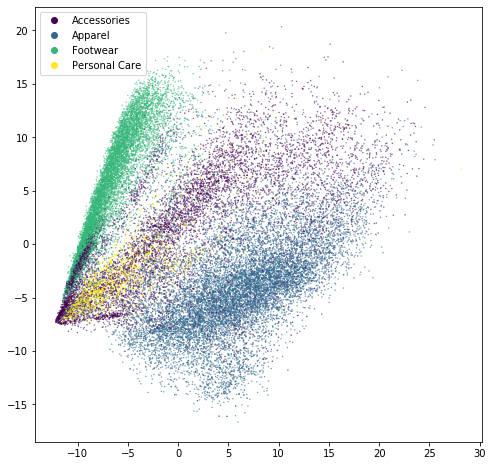

In [15]:
masterCat_codes = {'Accessories':0,'Apparel':1, 'Footwear':2, 'Personal Care':3}
df['colors'] = df['masterCategory'].apply(lambda x: masterCat_codes[x])
fig, ax = plt.subplots(figsize=(8,8))
scatter = ax.scatter( *full_pca.T, s=.1 , c=df['colors'], label= df['masterCategory'], cmap='viridis');
ax.legend(handles=scatter.legend_elements(num=[0,1,2,3])[0], labels=masterCat_codes.keys())
plt.show()

In [22]:
print('Explained Variance Ratio of Top Two Components : ', pca.explained_variance_ratio_)
print('Sum of Explained Variance : ', round(sum(pca.explained_variance_ratio_), 3))

Explained Variance Ratio of Top Two Components :  [0.25255391 0.16384011]
Sum of Explained Variance :  0.416


### Sub-Categories

In [404]:
def plot_subcat_PCA(df, cat_list, row=1, col=None):
    if col == None:
        col = len(cat_list)
    fig, axs = plt.subplots(row, col, figsize=(8*row, 8*col))
    for main_cat, ax in zip(cat_list, axs.flatten()):
        other_cats = list(df[df.masterCategory != main_cat].masterCategory.unique())
        other_cats_df = df[df.masterCategory.isin(other_cats)]
        g0 = other_cats_df[['pca_1', 'pca_2']]
        one_cat_df = df[df.masterCategory == main_cat]
        one_cat_dict = {k:v for v, k in enumerate(one_cat_df.subCategory.unique())} 
        data = [g0]
        groups = [f'Not {main_cat}']
        for k in one_cat_dict.keys():
            data.append(one_cat_df[one_cat_df.subCategory == k])
            groups.append(k)
        color_list = ['#BABABA','DarkBlue', 'purple', 'MediumVioletRed', 'OrangeRed', 'orange', 'DarkTurquoise','MediumSeaGreen']
        colors = color_list[:len(data)]
    
        for data, color, group in zip(data, colors, groups):
            x, y = data.pca_1, data.pca_2
            ax.scatter(x, y, c = color, edgecolors='none', s=2, label=group)
            ax.legend(loc=4, markerscale=4, scatterpoints=3)
            ax.set_title(f'PCA {main_cat} Sub-Categories')  

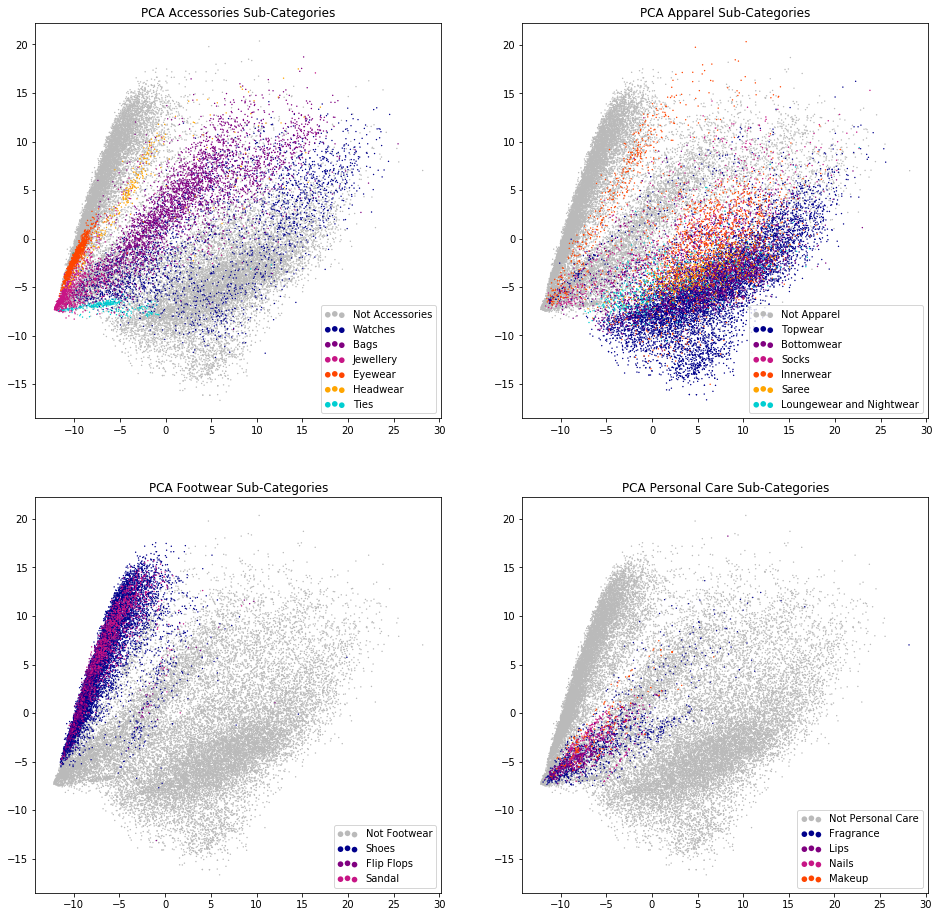

In [405]:
plot_subcat_PCA(df, ['Accessories', 'Apparel', 'Footwear', 'Personal Care'], 2, 2)